# Mount google drive

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd


# import dataset

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Insurance cross sell.csv')

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# descriptive stats

In [6]:
df.shape

(381109, 12)

In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [9]:
df.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [10]:
df.Vehicle_Damage.unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# one hot encoding

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [14]:
df['Gender'] = label.fit_transform(df['Gender'])

In [15]:
df['Vehicle_Damage'] = label.fit_transform(df['Vehicle_Damage'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 34.9+ MB


In [17]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


# EXPLORATORY DATA ANALYSIS

In [18]:

print("Males interested in insurance % :", df[(df['Gender'] == 1) &  
    (df['Response'] == 1)]['id'].count()*100/df[df['Gender'] == 1]['id'].count())

Males interested in insurance % : 13.841107482689518


In [19]:
print("Females interested in insurance % :", df[(df['Gender'] == 0) &  
    (df['Response'] == 1)]['id'].count()*100/df[df['Gender'] == 0]['id'].count())

Females interested in insurance % : 10.390241115301109


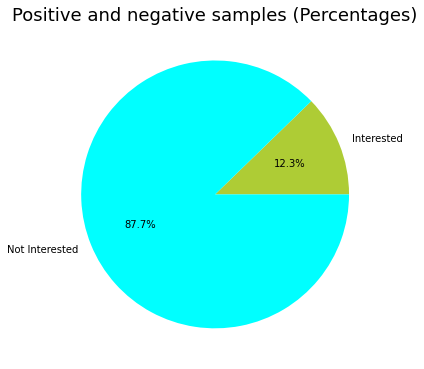

In [20]:
#Calculating positive and negative samples in percentages

positive_percent = len(df[df['Response'] == 1])/len(df)*100 
negative_percent = len(df[df['Response'] == 0])/len(df)*100
percentages = [positive_percent,negative_percent]

# Creating a pie chart
plt.figure(figsize = (6,8))
plt.pie(percentages, labels=['Interested','Not Interested'], autopct = '%.1f%%', colors = ['#aecc35', 'cyan'])
plt.title('Positive and negative samples (Percentages)', fontsize = 18)
plt.show()

This is a highly imbalanced dataset. The number of customers that actually took vehicle insurance is only 12.3% whereas the number of customers not interested is 87.7%

## GENDER

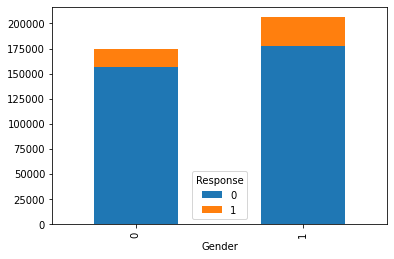

In [21]:
df.groupby(['Gender', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


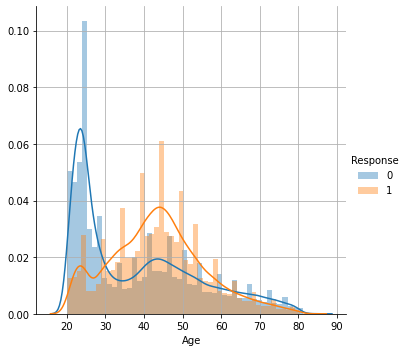

In [22]:
sns.FacetGrid(data = df, hue = 'Response', height = 5).map(sns.distplot, 'Age').add_legend()
plt.grid()
plt.show()

## DL

In [23]:
df.groupby(['Driving_License', 'Response']).size().unstack()

Response,0,1
Driving_License,,
0,771,41
1,333628,46669


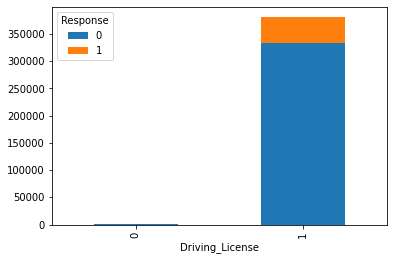

In [24]:
df.groupby(['Driving_License', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)

### Over 99.5% of the Customer have driving license

## PREV - INSURED

In [25]:
df.groupby(['Previously_Insured', 'Response']).size().unstack()

Response,0,1
Previously_Insured,,
0,159929,46552
1,174470,158


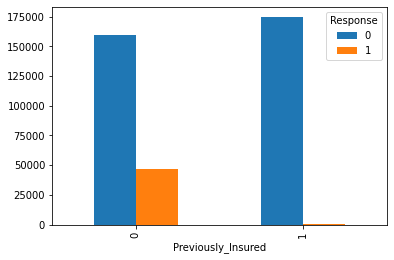

In [26]:
df.groupby(['Previously_Insured', 'Response']).size().unstack().plot(kind = 'bar')

### There are only 158 such peope who have previously got insured and want to insure again!
###Among the customers who already have their vehicle insured, almost all of them Responded NO.
###Among the customers who so not have have their vehicle insured, nearly 30% would want to get insured.
###So clearly, this is a good distinctive feature for prediction.

## VEHICLE- AGE

In [27]:
df.groupby(['Vehicle_Age', 'Response']).size().unstack()

Response,0,1
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


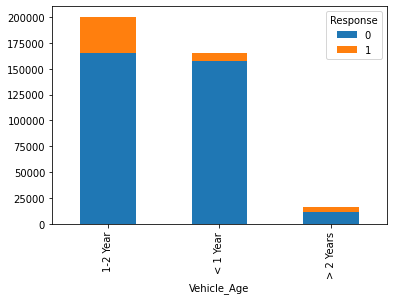

In [28]:
df.groupby(['Vehicle_Age','Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()


### If the age is less than 1 year, Customers are most likely to respond NO.

## VEHICLE- DAMAGE

In [29]:
df.groupby(['Vehicle_Damage', 'Response']).size().unstack()

Response,0,1
Vehicle_Damage,,
0,187714,982
1,146685,45728


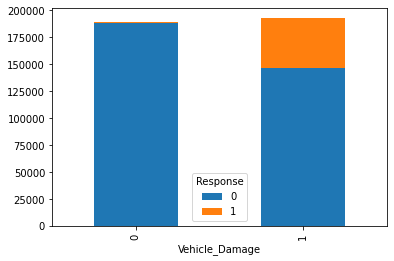

In [30]:
df.groupby(['Vehicle_Damage', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

### Customers whose vehicle is NOT damaged in past are almost certainly going to respond NO for vehicle insurance.

### So, like 'Previously_Insured', 'Vehicle_Damage' in past turns out to be an excellent feature!

## ANNUAL - PREMIUM

In [31]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [32]:
import numpy as np

np.percentile(df['Annual_Premium'], np.arange(90, 101))

array([ 48431.  ,  49412.28,  50505.  ,  51774.  ,  53287.  ,  55176.  ,
        57564.68,  60680.  ,  65380.84,  72963.  , 540165.  ])

In [33]:

# 99.9 percentile
np.percentile(df['Annual_Premium'], 99.9)

115554.0

### Clearly, 99 percentile is at 72963 and 99.9 percentile is at 115554.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


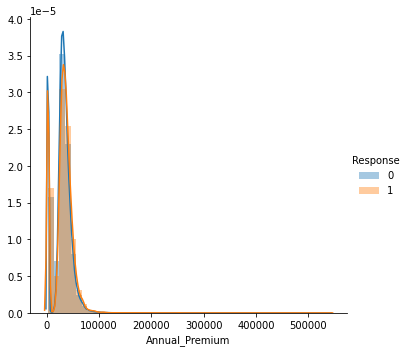

In [34]:
sns.FacetGrid(data = df, hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


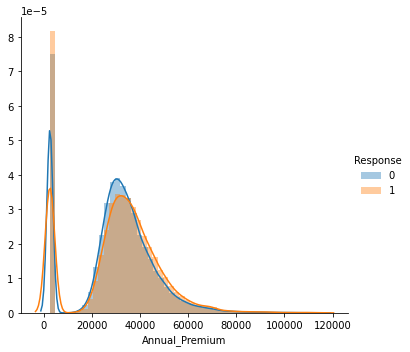

In [35]:
# Consider only upto 99.9 percentile 

sns.FacetGrid(data = df[df['Annual_Premium'] < np.percentile(df['Annual_Premium'], 99.9)], 
              hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


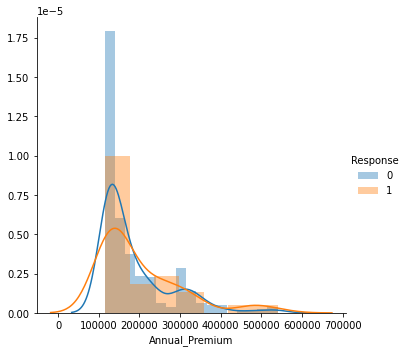

In [36]:
# Beyond 99.9 percentile 

sns.FacetGrid(data = df[df['Annual_Premium'] >= np.percentile(df['Annual_Premium'], 99.9)], 
              hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.show()

In [37]:
df.Age.describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

## VINTAGE

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


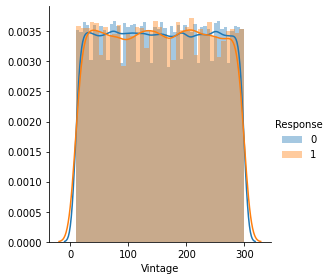

In [38]:
sns.FacetGrid(data = df, hue = 'Response', height = 4).map(sns.distplot, 'Vintage').add_legend()
plt.show()

## HEATMAP

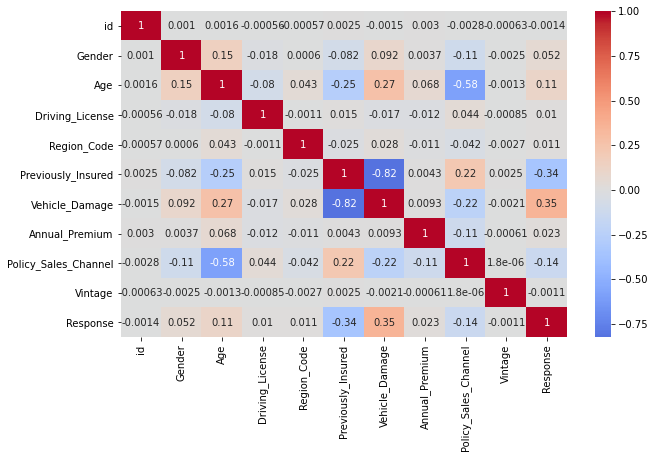

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', center = 0)
plt.show()

From the above:

---



The shape of the dataset is 3,81,109 rows and 12 columns

Data description:

Age: Mean age group is 36-39 years

Driving_License: Everyone insured has a driving license

Annual_Premium: Mean annual premium is Rs. 30,564/-

Vintage: Mean number of days the customer has been associated with the company 
is 154 days

Visualization description:

Response: More customers are not interested in Vehicle insurance

Vehicle_Damage: Nearly 50% of customers got their vehicles damaged in past

Vehicle_Age: Most of the vehicles are between the age of 1-2 years, followed by 
age less than a year, and very few vehicles with age more than 2 years

Gender: Nearly 55-60% of the customers are males

Driving_License: Almost everyone has a valid driving license

Previously_Insured: Nearly 55-60% customers don't have a vehicle insurance

Annual_Premium: Majority of the customers fall under 3,000 - 10,000 bracket

Age: Majority of the age group comes between 21-27 years of age
There are no missing values in this dataset
The data in this dataset are not positively or negatively correlated to one another i.e, there is no significant correlation in this dataset

## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb79367e780>,
      dtype=object)

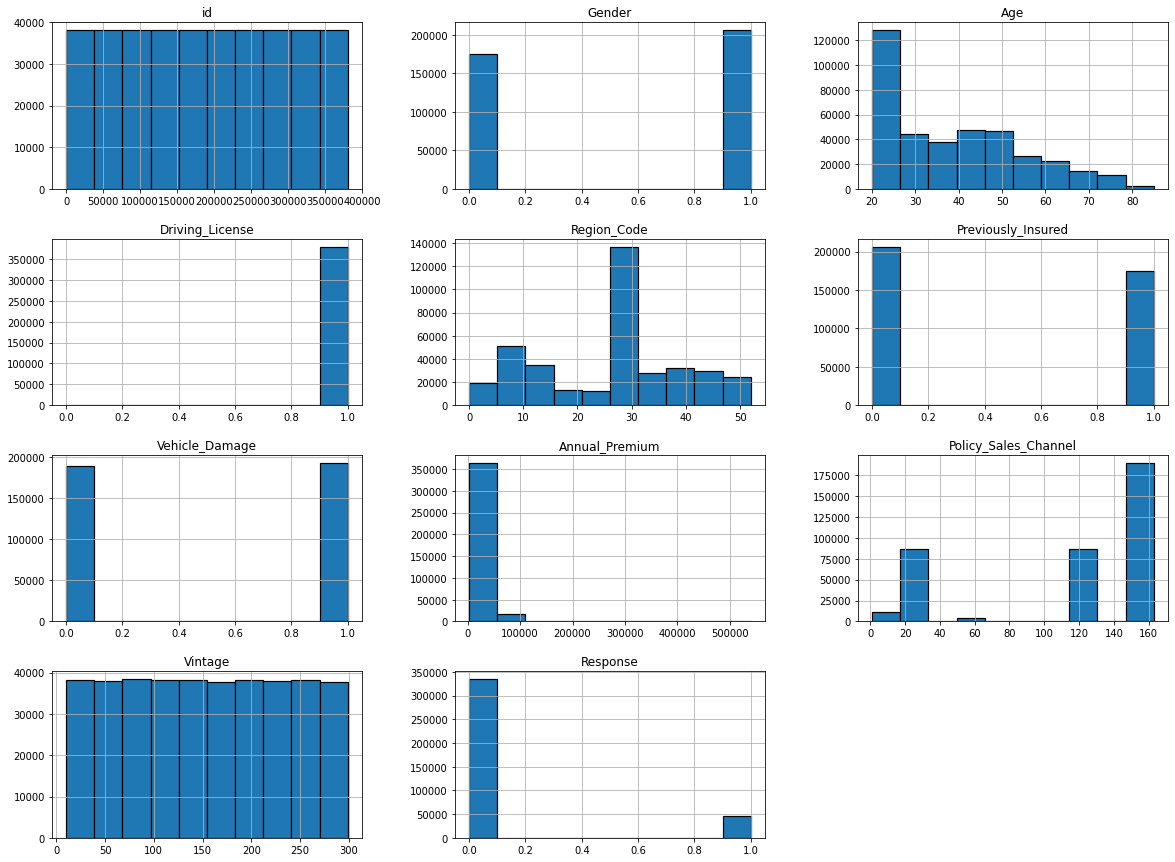

In [40]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20,15))


From the above histogram:

---
Age: Majority of data distribution is seen amongst the age group of 20-30 years

Policy_Sales_Channel: Majority of the data distribution is seen in the following three Channel code frequency bin:
*   Code frequency 160
*   Code frequency 20
*   Code frequency 120

Region_Code: The data is nearly equally distributed among all codes except for Code frequency bin 30 where maximum data distribution is observed
Vintage: Data seems to be nearly equally distributed among all frequency bins